In [1]:
import cv2
import os
from PIL import Image
from scipy import misc
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gzip
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img


# DATA Preprocessing

In [2]:
#Data Preprocessing

def create_dataset_train(img_folder):
   
    img_data_array=[]
    class_name=[]
    
    for file in os.listdir(img_folder):
        
        image_path = os.path.join(img_folder, file)
        image = load_img(image_path, 'rb')
        image = img_to_array(image)
        
        if image.shape[2] == 3:
            image = image.mean(2)
        img_data_array.append(image)
        name_index = file.split("_")
        name_index = int(name_index[0])
        class_name.append(name_index)
        
    return np.array(img_data_array), np.array(class_name)

def create_dataset_test(img_folder):
   
    img_data_array=[]
    class_name=[]
    
    for file in os.listdir(img_folder):
        
        image_path = os.path.join(img_folder, file)
        image = load_img(image_path, 'rb')
        image = img_to_array(image)
        
        if image.shape[2] == 3:
            image = image.mean(2)
        img_data_array.append(image)
        name_index = file.split(".")
        name_index = int(name_index[0])
        class_name.append(name_index)
        
    return np.array(img_data_array), np.array(class_name)

def normalization(image):
    image = image / image.max()
    image = image.reshape([-1, 56, 46, 1])
    return image


training_path = "./02_face_training"
test_path = './02_face_test'

train_data, train_label = create_dataset_train(training_path)
test_data, _ = create_dataset_test(test_path)

train_data = normalization(train_data)
test_data = normalization(test_data)

In [3]:
#preparing test_result_DataFrame

test_index = os.listdir(test_path)
temp = []

for index in test_index:
    index = index.split(".")
    temp.append(int(index[0]))
    
test_index = temp

In [4]:
print('Shape of Train images :',train_data.shape)
print('Shape of Train labels : ', train_label.shape)
print('Shape of Test images : ', test_data.shape)

Shape of Train images : (1050, 56, 46, 1)
Shape of Train labels :  (1050,)
Shape of Test images :  (700, 56, 46, 1)


# Model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(56, 46)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(351, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2576)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               659712    
_________________________________________________________________
dense_1 (Dense)              (None, 351)               90207     
Total params: 749,919
Trainable params: 749,919
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
tracking = model.fit(train_data, train_label, epochs = 38)

Epoch 1/38
33/33 [==============================] - 1s 6ms/step - loss: 6.0006 - accuracy: 0.0000e+00
Epoch 2/38
33/33 [==============================] - 0s 6ms/step - loss: 5.8136 - accuracy: 0.0105
Epoch 3/38
33/33 [==============================] - 0s 6ms/step - loss: 5.6445 - accuracy: 0.0095
Epoch 4/38
33/33 [==============================] - 0s 6ms/step - loss: 5.3578 - accuracy: 0.0210
Epoch 5/38
33/33 [==============================] - 0s 6ms/step - loss: 5.0053 - accuracy: 0.0362
Epoch 6/38
33/33 [==============================] - 0s 6ms/step - loss: 4.5905 - accuracy: 0.0638
Epoch 7/38
33/33 [==============================] - 0s 6ms/step - loss: 4.1839 - accuracy: 0.1019
Epoch 8/38
33/33 [==============================] - 0s 6ms/step - loss: 3.8183 - accuracy: 0.1467
Epoch 9/38
33/33 [==============================] - 0s 6ms/step - loss: 3.5046 - accuracy: 0.1914
Epoch 10/38
33/33 [==============================] - 0s 6ms/step - loss: 3.2319 - accuracy: 0.2314
Epoch 11/38
33/

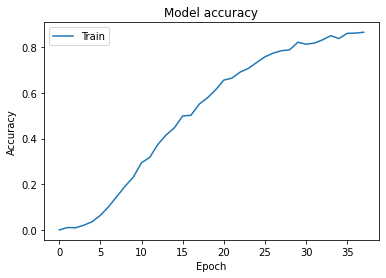

In [8]:
def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc=0)

plt_show_acc(tracking)

# Training Validation

In [9]:
predictions = model.predict(train_data)

In [10]:
print(predictions.shape)

(1050, 351)


In [11]:
predict_label = []
for image in predictions:
    predict_label.append(np.argmax(image))

In [12]:
predict_label = np.array(predict_label)

In [13]:
def accuracy(original, prediction):
    accuracy = original == prediction
    accuracy = np.count_nonzero(accuracy)
    
    return accuracy / original.shape[0]
    
accuracy(train_label, predict_label)

0.9047619047619048

# Test

In [14]:
predictions = model.predict(test_data)

In [15]:
print(predictions.shape)

(700, 351)


In [16]:
test_label = []
for image in predictions:
    test_label.append(np.argmax(image))

In [17]:
test_label = np.array(test_label)

In [18]:
#결과
print(test_label)

[ 80 153 296 214 290  51 326 107 251   3 219 273 213  29  30 227 197 269
 324  53 324 194 280 266 233 234 177 319 136 271 213 239 278 158 216 287
 180 283 317 177 283 210 241 337  19 177 342 168 222 347 213 213 164 186
 283 226 162 101 125 296  61 197 134 220 218 154 177  92 238 279 120 286
 165 181  79  91 209  99  85 232 245 320 125 100 290 224 203 294 160 225
 266  77 254 240   5 109 232  30 200 135 151 334 169 345  30 308 238 152
 109 167 203 270 226 217 310 212 109 228 196 226  32 278 238 213 320  90
 276 205 241 345 197 213 151 200 151 178 248 234 242 333  38  59 212 247
 234 179 278 310  34 233 157  85 324 125 296 122 226 334 216 215 226 107
  85 264 211 314  34 173 125 177 188 162 180 213 168 302 227 316 317 236
  96 226 287 109 213  93 228 239 127 136 223 320 157  79 262 243 215 262
 195 263 296 167 233 109 305 341 305 333 154 253 111 155 167  99  30  79
 271  92 348 290 283 250 200 253 233 252 246 161 295  46 118 227  85 213
 175 248 193 134 284 336  39 341 241 308 234 312 18

# Extract Pandas DataFrame

In [19]:
test_result_df = pd.DataFrame([x for x in zip(test_index, test_label)], columns=['Image', 'Answer'])

In [20]:
test_result_df.head()

,Image,Answer
0,1,80
1,10,153
2,100,296
3,101,214
4,102,290


In [21]:
test_result_df = test_result_df.sort_values(by="Image")
test_result_df.head()

,Image,Answer
0,1,80
111,2,270
222,3,200
333,4,228
444,5,303


In [22]:
test_result_df.to_csv("./result.csv", index=False)